# Step 1 - Gather data

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import json
import random
%matplotlib inline

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

imagep_df = pd.read_csv('image-predictions.tsv', sep="\t")
imagep_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
imagep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
tweets_list = []
with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)

In [7]:
tweets_df = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [8]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Step 2 - Assessing Dataset

In [9]:
#create copy of the dataset
twitter_archive_clean = twitter_archive_df.copy()
imagep_clean = imagep_df.copy()
tweets_clean = tweets_df.copy()

In [10]:
#checking the structure of the DataFrames
twitter_archive_clean.shape, imagep_clean.shape, tweets_clean.shape

((2356, 17), (2075, 12), (2354, 3))

## Assessing Twitter Archive

In [11]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### The following columns have missing data and since the are ids, they will be dropped
> remove retweets and replys
> in_reply_to_status_id and in_reply_to_user_id have 78 records
> retweeted_status_id,  retweeted_status_user_id and retweeted_status_timestamp have 181 records
> The expanded urls will also be dropped, as we have another column in imagep_df containing the image url

In [13]:
twitter_archive_clean['timestamp'].sample()

2143    2015-11-26 20:04:40 +0000
Name: timestamp, dtype: object

#### This column will be converted to datetime datatype

In [14]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### These rows will have to be clean to extract the text from the anchor tag

In [15]:
#increase the width of the columns
pd.set_option('display.max_colwidth', 500)

In [16]:
twitter_archive_clean[['text', 'rating_numerator', 'rating_denominator']].sample(20)

,text,rating_numerator,rating_denominator
658,When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh,13,10
538,RT @dog_rates: Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 12/10 https://t.c…,12,10
466,This is Tebow. He kindly requests that you put down the coffee and play with him. 13/10 such a good boy https://t.co/56uBP28eqw,13,10
1800,This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zczS0lI5,11,10
2200,Say hello to Winifred. He is a Papyrus Hydrangea mix. Can tie shoes. 11/10 inspiring pup https://t.co/mwnBN6ZkPt,11,10
606,RT @dog_rates: This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm,11,10
2111,Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp,11,10
1617,Meet Gerbald. He just found out he's adopted. Poor pupper. Snazzy tongue tho. 11/10 would hold close in time of need https://t.co/UfGkB9Wrud,11,10
782,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,11,10
505,This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG,10,10


#### While visually assessing the above table, there are indication that some images are not dog image

In [17]:
 twitter_archive_clean[twitter_archive_df['text'].str.match('.*only rate dog')].index

Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

#### these indexes will be dropped

In [18]:
twitter_archive_clean[['doggo','floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

#### Since the four columns above are stages of dogs, we will have to combine then into one columns dog stages

## Assessing Imagep_clean

In [19]:
imagep_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
imagep_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### The columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine to two columns, dog breed and confidence and, since our analysis is about dog tweets, the img_num in this dataset will be drop , as it will not impact our analysis

## Assessing tweets_clean

In [21]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### this dataset appears clean, butwe will have to conver the id to tweets_id

# Summary

#### Quality
1. retweets and reply will be identified and dropped
2.  The following columns had missing values  and they were be dropped as they will not impact our analysis
    - in_reply_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
3. The timestamp column is in the wrong data type and was converted to datetime
4. The source column had text in an anchor tag and we need to extract only the text
5. There were tweets that are not about dogs in the text column, this will be dropped
6. The expanded urls column is not needed for our analysis, it will be dropped
7. The none value in doggo, floofer, pupper, will be dropped
8. rating_numerator to be properly extracted
9. rename id in the tweets df as tweets_id



#### Tidyness
1. These columns doggo, floofer, pupper and puppo will be combined into one
2. These columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be combine into two columns, dog breed and confidence
3. The three datasets will be merged into one

# Step 3  - Cleaning Data

#### Define
>identify retweets and reply and drop them

#### Code

In [22]:
retweets = twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index
retweets

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [23]:
replies = twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index
replies

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [24]:
def drop_row_col(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)

drop_row_col(twitter_archive_clean, retweets)
drop_row_col(twitter_archive_clean, replies)

#### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define
1.  The following columns with missing values will be dropped
  - in_reply_status_id
  - in_reply_to_user_id
  - retweeted_status_id
  - retweeted_status_user_id
  - retweeted_status_timestamp

#### Code

In [26]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp']

drop_row_col(twitter_archive_clean, columns, axis=1)

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
- Convert timestamp to datetime

#### Code

In [28]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'])

#### Test

In [29]:
twitter_archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

#### Define
> extract text from anchor tags in the source column

#### Code

In [30]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [31]:
twitter_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Define
> drop all tweets in rows that are not about dogs

#### Code

In [32]:
tweets_not_dogs =  twitter_archive_clean[twitter_archive_clean['text'].str.match('.*only rate dog')].index

drop_row_col(twitter_archive_clean, tweets_not_dogs)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2043 non-null   int64              
 1   timestamp           2043 non-null   datetime64[ns, UTC]
 2   source              2043 non-null   object             
 3   text                2043 non-null   object             
 4   expanded_urls       2040 non-null   object             
 5   rating_numerator    2043 non-null   int64              
 6   rating_denominator  2043 non-null   int64              
 7   name                2043 non-null   object             
 8   doggo               2043 non-null   object             
 9   floofer             2043 non-null   object             
 10  pupper              2043 non-null   object             
 11  puppo               2043 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
> drop expnaded urls column

#### Code

In [34]:
column = ['expanded_urls']

drop_row_col(twitter_archive_clean, column, axis=1)

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2043 non-null   int64              
 1   timestamp           2043 non-null   datetime64[ns, UTC]
 2   source              2043 non-null   object             
 3   text                2043 non-null   object             
 4   rating_numerator    2043 non-null   int64              
 5   rating_denominator  2043 non-null   int64              
 6   name                2043 non-null   object             
 7   doggo               2043 non-null   object             
 8   floofer             2043 non-null   object             
 9   pupper              2043 non-null   object             
 10  puppo               2043 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 191.5+ KB


#### Define
> doggo, floofer, pupper, puppo will be combined as dod_stages
> and the none values will be drop

#### Code

In [36]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [37]:
#create the column in twitter archive and replace none with nan
twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages].replace('None', np.nan)

In [38]:
def join_all(x):
    return ', '.join(x.dropna().astype(str))

twitter_archive_clean['dog_stages'] = twitter_archive_clean[dog_stages].apply(join_all, axis=1)

In [39]:
#replace empty string with nan
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace('', np.nan)

In [40]:
#drop the four column: doggo, floofer, pupper, puppo
drop_row_col(twitter_archive_clean, dog_stages, axis=1)

#### Test

In [41]:
twitter_archive_clean.dog_stages.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

#### Define
> dog rating to be properlly extracted

#### Code

In [42]:
#extract the correct rating numerator from text and store as rating_numerator
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', 
                                                                                      expand=False).str.split('/').str[0]

#### Test

In [43]:
#checking row 45 (to confirm it is correct as 13.5
print(twitter_archive_clean[twitter_archive_clean['rating_numerator'] =='13.5']['rating_numerator'])
twitter_archive_clean['rating_numerator'] = pd.to_numeric(twitter_archive_clean['rating_numerator'])
twitter_archive_clean.info()

45    13.5
Name: rating_numerator, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2043 non-null   int64              
 1   timestamp           2043 non-null   datetime64[ns, UTC]
 2   source              2043 non-null   object             
 3   text                2043 non-null   object             
 4   rating_numerator    2043 non-null   float64            
 5   rating_denominator  2043 non-null   int64              
 6   name                2043 non-null   object             
 7   dog_stages          336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 143.6+ KB


#### Define
>

In [44]:
# setup the conditions for selection
criteria = [(imagep_clean['p1_dog'] == True),(imagep_clean['p2_dog'] == True), (imagep_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breed = [imagep_clean['p1'], imagep_clean['p2'], imagep_clean['p3']]

# set the choice order for confidence level based on the selection conditions
confidence = [imagep_clean['p1_conf'], imagep_clean['p2_conf'], imagep_clean['p3_conf']]

# select the predicted breed based on the first successful condition
imagep_clean['breed'] = np.select(criteria, breed, default = 'none')

# select the predicted confidence level based on the first successful condition
imagep_clean['confidence'] = np.select(criteria, confidence, default = 0)

In [45]:
columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num']

drop_row_col(imagep_clean, columns, axis=1)

#### Test

In [46]:
imagep_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       2075 non-null   object 
 3   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


#### Define
> rename id as tweet_id in the tweets dataframe

#### Code

In [47]:
tweets_clean.columns = ['tweet_id', 'retweet_count','favorite_count']

#### Test

In [48]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Combining the dataset

In [49]:
combined_dataset = pd.merge(twitter_archive_clean, tweets_clean, on= 'tweet_id', how='left')

In [50]:
combined_dataset = pd.merge(combined_dataset, imagep_clean, on='tweet_id', how='inner')

In [51]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1917 non-null   int64              
 1   timestamp           1917 non-null   datetime64[ns, UTC]
 2   source              1917 non-null   object             
 3   text                1917 non-null   object             
 4   rating_numerator    1917 non-null   float64            
 5   rating_denominator  1917 non-null   int64              
 6   name                1917 non-null   object             
 7   dog_stages          303 non-null    object             
 8   retweet_count       1917 non-null   int64              
 9   favorite_count      1917 non-null   int64              
 10  jpg_url             1917 non-null   object             
 11  breed               1917 non-null   object             
 12  confidence          1917 non-null 

In [52]:
combined_dataset.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,1.917000e+03,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,7.352520e+17,12.224716,10.490871,2721.184664,8736.636411,0.464178
std,6.733677e+16,42.187551,6.948704,4656.052337,12095.233439,0.340148
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,0.000000
25%,6.755224e+17,10.000000,10.000000,618.000000,1889.000000,0.139613
50%,7.079958e+17,11.000000,10.000000,1336.000000,4026.000000,0.457117
75%,7.869631e+17,12.000000,10.000000,3154.000000,11203.000000,0.776612
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,0.999956


#### The max value in the dog_trating is too large compared to the 25, 50 and 75 percentile, also there is not point keeping dog tweets with rating less than 5

## checking dog_rating for outliers

#### Define
> drop outliers from rating_numerator and all rating numerator below 5 will be dropped

#### Code

In [53]:
#programatically checking for outliers
max_quantile = combined_dataset['rating_numerator'].quantile(0.95)
max_quantile

13.0

In [54]:
combined_dataset = combined_dataset[combined_dataset['rating_numerator'] <= max_quantile ]

In [55]:
combined_dataset = combined_dataset[combined_dataset['rating_numerator'] > 4 ]

#### Test

In [56]:
combined_dataset.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,1.820000e+03,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,7.349261e+17,10.674879,10.001099,2639.148901,8524.903297,0.474000
std,6.688653e+16,1.788781,0.033141,4543.495000,11744.338110,0.336388
min,6.660209e+17,5.000000,10.000000,16.000000,81.000000,0.000000
25%,6.757713e+17,10.000000,10.000000,611.750000,1880.500000,0.167016
50%,7.078734e+17,11.000000,10.000000,1323.500000,4004.000000,0.468685
75%,7.860044e+17,12.000000,10.000000,3117.750000,11017.000000,0.782200
max,8.924206e+17,13.000000,11.000000,79515.000000,132810.000000,0.999956


# Step 4 - Data Storage

#### Define
> store cleaned DataFrame as csv

#### Code

In [57]:
combined_dataset.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [58]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


#### Define
> store the cleaned DataFrame in a sqlite datatbase

#### Code

In [59]:
import sqlite3
import sqlalchemy

In [60]:
conn = sqlite3.connect('WeRateDogs.db')

In [61]:
engine = sqlalchemy.create_engine('sqlite:///WeRateDogs.db')

In [62]:
twitter_archive_clean.to_sql('twitter_archive_master', engine, if_exists='replace', index=False)

2043

#### Test

In [63]:
pd.read_sql('SELECT * FROM twitter_archive_master', engine)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27.000000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03.000000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51.000000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24.000000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None
...,...,...,...,...,...,...,...,...
2038,666049248165822465,2015-11-16 00:24:50.000000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10,None,None
2039,666044226329800704,2015-11-16 00:04:52.000000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10,a,None
2040,666033412701032449,2015-11-15 23:21:54.000000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10,a,None
2041,666029285002620928,2015-11-15 23:05:30.000000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10,a,None


# Step 5 - Analyzing and Visualizing Data

In [64]:
#set look and fell of plots
sb.set(rc={"figure.figsize":(12, 8)})

## What is the top source, users tweeted from?

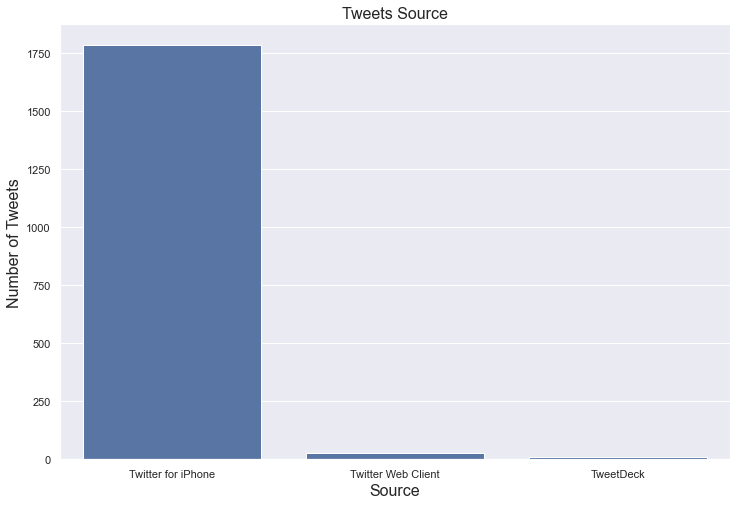

In [65]:
color_base = sb.color_palette()[0]
sb.countplot(data=combined_dataset, x='source', color=color_base)
plt.title('Tweets Source', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Source', fontsize = 16);

## Iphone users accounts for almost all the dog tweets

## The top 10 most popular dog breed in the tweets

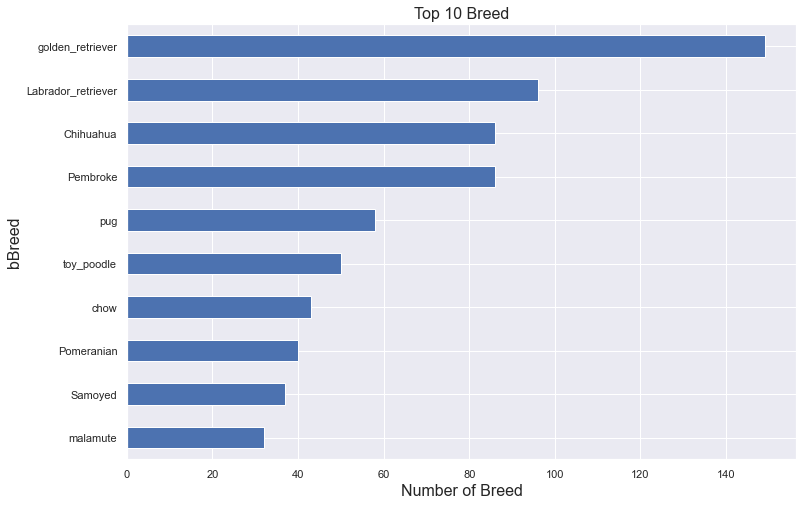

In [66]:
dog_breed = combined_dataset[combined_dataset['breed']!='none']['breed'].value_counts().head(10)

dog_breed.plot(kind='barh')
plt.title('Top 10 Breed', fontsize = 16)
plt.ylabel('bBreed', fontsize = 16)
plt.xlabel('Number of Breed', fontsize = 16)
plt.gca().invert_yaxis();

#### The top most comon  breed among the dogs is Golden Retriever followed by Labrador Retriever and Chihuahua

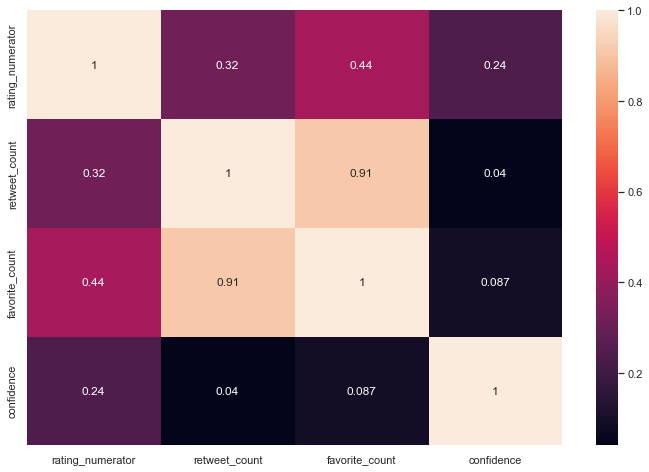

In [67]:
sb.heatmap(combined_dataset[['rating_numerator', 'retweet_count', 'favorite_count', 'confidence']].corr(), annot=True);

## favorite_count has positive correlation with retweet_counts

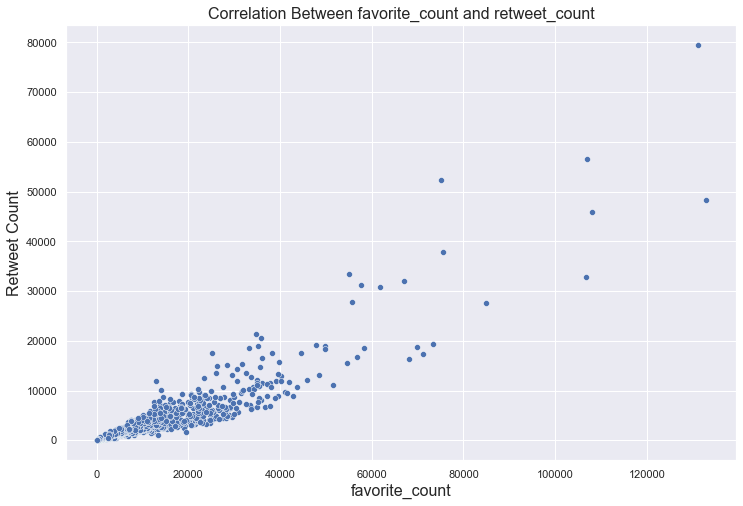

In [68]:
sb.scatterplot(data=combined_dataset, x="favorite_count", y="retweet_count")
plt.title('Correlation Between favorite_count and retweet_count', fontsize = 16)
plt.ylabel('Retweet Count', fontsize = 16)
plt.xlabel('favorite_count', fontsize = 16);

### Trend analysis of tweets (Retweet_counts and Favorite_count)

## Top rated dog based on retweets

In [69]:
top_dog_retweeted = combined_dataset[combined_dataset['retweet_count'] ==combined_dataset['retweet_count'].max()]

In [70]:
top_dog_retweeted['jpg_url']

742    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

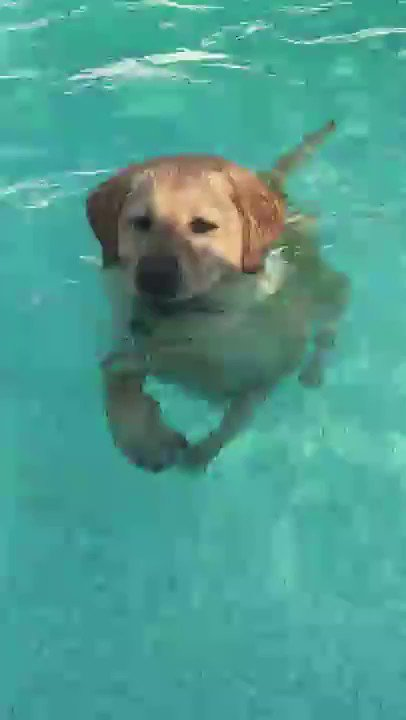

In [71]:
from IPython import display
display.Image('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

#### This is the dog image that won based on retweets 

## Top rated dog based on favorite count

In [72]:
top_dog_fovorite = combined_dataset[combined_dataset['favorite_count'] ==combined_dataset['favorite_count'].max()]
top_dog_fovorite['jpg_url']

292    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

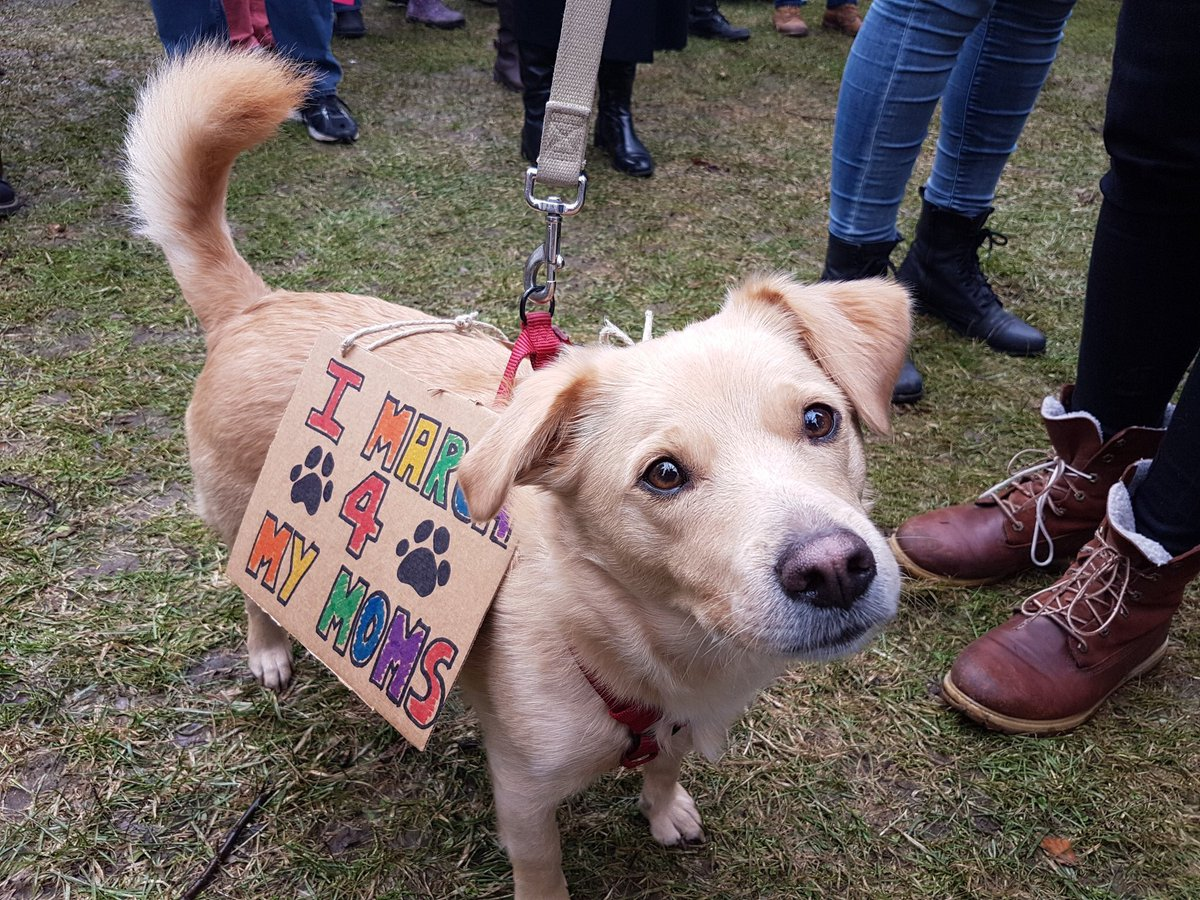

In [73]:
display.Image('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

### This dog image won based on favorite count

## The winner of the contest, which is top rated based on dog rating and retweet count and favorite count

In [74]:
toprated_retweets_fav_count = combined_dataset[combined_dataset['rating_numerator'] == 13.0]
toprated_retweets_fav_count[['retweet_count', 'favorite_count', 'confidence','jpg_url']].sort_values(by=['retweet_count', 'favorite_count'], ascending=False)

,retweet_count,favorite_count,confidence,jpg_url
742,79515,131075,0.825333,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
379,56625,107015,0.505370,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
775,52360,75163,0.503372,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg
292,48265,132810,0.196015,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
56,45849,107956,0.383404,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
...,...,...,...,...
1444,563,1838,0.416385,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg
1522,521,1460,0.989853,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg
206,495,4204,0.000000,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg
1463,278,1180,0.801903,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg


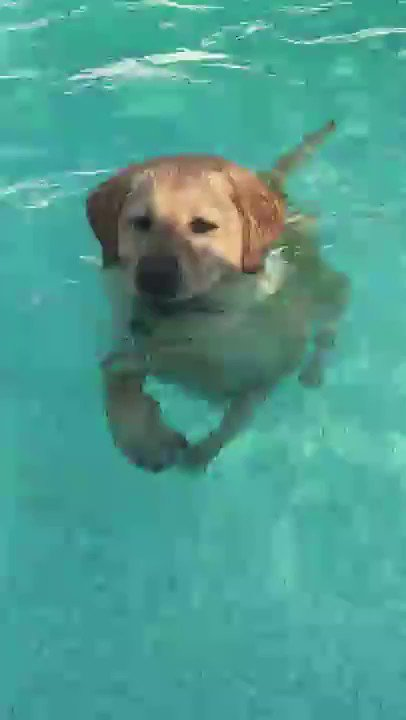

In [75]:
display.Image('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

## References
- Heatmap https://datatofish.com/correlation-matrix-pandas/
- Outliers detection https://www.youtube.com/watch?v=7sJaRHF03K8&t=39s 
- Sqlite https://www.youtube.com/watch?v=pU53JUhSnkY&list=PL9ATnizYJ7f8zsx5jBwUSSxehZN1QjnOH
- DataFrame notnull https://www.youtube.com/watch?v=YpXUoVnG1is